## Partie 2 - PCA 

### Analyse en composantes principales

Question théorique - *Si deux variables sont parfaitement corrélées dans l'ensemble de données, serait-il approprié de les inclure toutes les deux dans l'analyse lors de la réalisation d'une ACP ? Justifiez votre réponse. À l'inverse, que se passe-t-il si les variables ne sont absolument pas corrélées ?*


## Variables parfaitement corrélées

**Non, il n'est PAS recommandé d'inclure les deux variables dans l'analyse PCA.**

- **Redondance complète d'information** : Deux variables parfaitement corrélées (r = ±1) contiennent exactement la même information. L'une est simplement une transformation linéaire de l'autre, donc inclure les deux n'apporte aucune valeur ajoutée à l'analyse.

- **Problème de singularité matricielle** : La matrice de covariance devient singulière (non inversible), ce qui crée des instabilités numériques lors du calcul des valeurs propres et vecteurs propres. Cela peut faire échouer l'algorithme PCA ou produire des résultats non fiables.

- **Inflation artificielle de la dimensionnalité** : Garder les deux variables augmente artificiellement le nombre de dimensions sans enrichir la structure des données, ce qui va à l'encontre de l'objectif principal de la PCA qui est la réduction de dimension.

## Variables complètement non corrélées

**Oui, il est tout à fait approprié d'inclure les deux variables dans l'analyse PCA.**

- **Information orthogonale et complémentaire** : Des variables non corrélées (r = 0) capturent des aspects indépendants et distincts des données. Chacune apporte une contribution unique à la variance totale, ce qui enrichit l'analyse.

- **Alignement naturel avec la PCA** : La PCA cherche à identifier des composantes principales orthogonales (non corrélées). Des variables déjà non corrélées représentent des directions naturelles dans l'espace des données, facilitant l'identification des axes de variance maximale.

- **Réduction de dimension efficace** : La PCA pourra évaluer l'importance relative de chaque variable indépendante et déterminer lesquelles contribuent le plus à la variance. C'est exactement le scénario où la PCA peut effectuer une réduction de dimension informée et optimale.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns

from dotenv import load_dotenv
import os
from pathlib import Path

load_dotenv("../.env")

DATA_PATH = Path(os.getenv("DATA_PATH"))
FIGURES_PATH = Path(os.getenv("FIGURES_PATH"))

prostate = pd.read_csv(DATA_PATH, sep=r"\s+")


def save_fig(name):
    plt.savefig(FIGURES_PATH / name, dpi=600, bbox_inches="tight")

### PCA - Python

1. Sélection des variables quantitatives (transformées en log)
2. Standardisation 
3. PCA
4. Variance expliquée


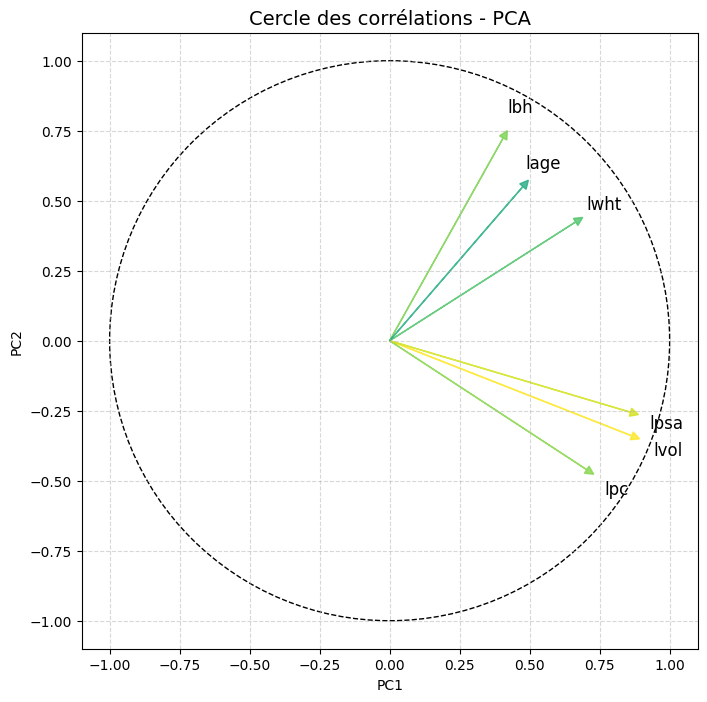

In [2]:
# Variables log
prostate["lvol"] = np.log(prostate["vol"])
prostate["lwht"] = np.log(prostate["wht"])
prostate["lbh"] = np.log(prostate["bh"])
prostate["lpc"] = np.log(prostate["pc"])
prostate["lpsa"] = np.log(prostate["psa"])
prostate["lage"] = np.log(prostate["age"])

X = prostate[["lvol", "lwht", "lbh", "lpc", "lpsa", "lage"]]


# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_

# loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

pc1 = loadings[:, 0]
pc2 = loadings[:, 1]

variables = ["lvol", "lwht", "lbh", "lpc", "lpsa", "lage"]

# Contribution (somme des carrés sur PC1 et PC2)
contrib = pc1**2 + pc2**2
colors = plt.cm.viridis(contrib / contrib.max())

fig, ax = plt.subplots(figsize=(8, 8))

# Cercle unité
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
ax.add_artist(circle)

# Flèches et labels
for i, var in enumerate(variables):
    ax.arrow(0, 0, pc1[i], pc2[i],
             head_width=0.03, head_length=0.03,
             fc=colors[i], ec=colors[i], alpha=0.8)
    ax.text(pc1[i]*1.15, pc2[i]*1.15, var,
            color='black', ha='center', va='center', fontsize=12)

# Axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)

plt.title("Cercle des corrélations - PCA", fontsize=14)
filename = "cercle_correlation_pca.png"
save_fig(filename)
plt.show()